<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Introducción matemática.</h2></font> 
<font color="#6E6E6E"><h2 align="left">Estadística y Contrastes de Hipótesis.</h2></font> 

#### Antonio José Serrano López

En este curso, se introducirán nociones de estadística así como los estadísticos clásicos y robustos más utilizados, así como los contrastes de hipótesis y su importancia dentro de la Ciencia de Datos. Comenzaremos con el repaso de la distribución normal y su relación con el valor medio mediante la ley de los grandes números y el teorema del límite central. 
Los intervalos de confianza darán paso al concepto de contraste de hipótesis, variantes y posibles aplicaciones. Compararemos los conceptos de  significancia y tamaño del efecto. Y terminaremos repasando los contrastes más utilizados: pruebas de normalidad (Kolmogorov-Smirnov y Shapiro-Wilk), pruebas paramétricas (comparación de medias, t-student y ANOVA), pruebas no paramédicas (Mann-Whitney, Wilcoxon Signed-Rank, Kruskal-Wallis y Friedman) y pruebas de relación o asociación (correlación y Chi2)

In [1]:
#https://pingouin-stats.org/build/html/index.html
#%conda install -c conda-forge pingouin
#%pip install pingouin

In [2]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
from scipy.stats import norm
import statsmodels.api as sm 
import pandas as pd # importando pandas
import seaborn as sns # importando seaborn
import matplotlib.pyplot as plt # importando pyplot
import pingouin as pg 

# Estadísticos

Queremos describir/resumir los datos en valores que muestren alguna carácterística interesante para nosotros. La expresión matemática que la obtiene se denominia estadístico (porque se aplica sobre datos).

In [8]:
edades_familia=[3,3,7,32,33]
salarios_departamento=[300,900,900,900,1200,1200,1500,1800,2000,2600,3300,8900]

## Estadísticos clásicos

In [41]:
datos=edades_familia
#datos=salarios_departamento
#solución
stats.describe(datos)
#import statsmodels.stats.descriptivestats as smd 
#smd.describe(Kim)

DescribeResult(nobs=5, minmax=(3, 33), mean=15.6, variance=240.79999999999995, skewness=0.3771611176977245, kurtosis=-1.8149735861083212)

#### **[Ejercicio] Obtén los estadísticos de stats.describe**

Utilizando funciones de:

* numpy 
https://numpy.org/doc/stable/reference/routines.statistics.html

* stats 
https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics


In [10]:
#solucion
x=edades_familia
print(f"nobs={len(x)},minmax=({np.min(x)}, {np.max(x)}),mean={np.mean(x)}, variance={np.var(x,ddof=1)}, skewness={stats.skew(x)}, kurtosis={stats.kurtosis(x)}")

nobs=5,minmax=(3, 33),mean=15.6, variance=240.79999999999995, skewness=0.3771611176977245, kurtosis=-1.8149735861083212


#### **[Ejercicio] Compara la media y la media truncada a 900 y 6000**

In [11]:
datos=salarios_departamento
#solucion
np.mean(datos),stats.tmean(datos,limits=(900,6000)),np.median(datos)
#es interesante stats.trim_mean(a, proportiontocut, axis=0)

(2125.0, 1630.0, 1350.0)

## Estadísticos robustos

#### **[Ejercicio] Obtén la mediana y el rango intercuartil. Compara los resultados con loe estadísticos robustos**

In [12]:
datos=salarios_departamento
#solucion
print(np.median(datos),stats.iqr(datos))
print(np.mean(datos),np.std(datos))

1350.0 1250.0
2125.0 2190.176933491904


## Otros estadísticos interesantes

#### **[Ejercicio] Investiga qué hacen los siguientes estadísticos**

https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics

In [13]:
stats.variation(datos) 
#solution
#np.std(datos)/np.mean(datos)
stats.variation(edades_familia), stats.variation(salarios_departamento) #mas o menos lo mismo :-)

(0.8897103370716652, 1.0306714981138372)

In [14]:
stats.rankdata(datos)
#solution
#orden de los datos, en caso de empate 
stats.rankdata([300,900,900,900,1200,1200,1500,1800,2000,2600,3300,8900])

array([ 1. ,  3. ,  3. ,  3. ,  5.5,  5.5,  7. ,  8. ,  9. , 10. , 11. ,
       12. ])

In [15]:
stats.hmean(datos)
#solution
#1/sum((1/xi))

1105.4242362950504

In [16]:
stats.median_abs_deviation(datos)
#solucion
#Median Absolute Deviation (sobre la media)
stats.median_abs_deviation(datos),stats.median_abs_deviation(datos,center=np.median),stats.median_abs_deviation(datos,center=np.mean)

(450.0, 450.0, 1050.0)

# Distribución de probabilidad Normal

Densidad de probabilidad de una distribución $N(\mu,\sigma)$

$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} \mathrm{e}^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

## PDF

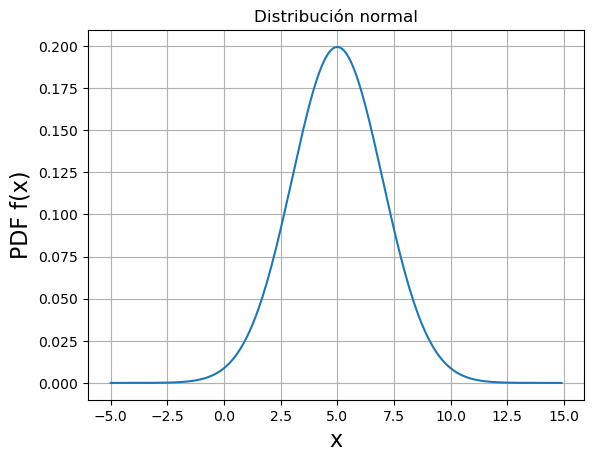

In [17]:
#https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

# Generate the data
x = np.arange(-5,15,0.1)
# Plot a normal distribution: "Probability density functions"
mu = 5
sigma = 2
y = stats.norm(loc=mu, scale=sigma).pdf(x)
plt.plot(x,y)
#y2 = stats.norm(mu, 2*sigma).pdf(x)
#plt.plot(x,y2,'r')
plt.title('Distribución normal')
plt.xlabel("x",fontsize=16)
plt.ylabel("PDF f(x)",fontsize=16)
#plt.legend()
plt.grid()
plt.show()

#### **[Ejercicio] Distribución normal estándard**

Representa la distribución Z, es decir, N(0,1)

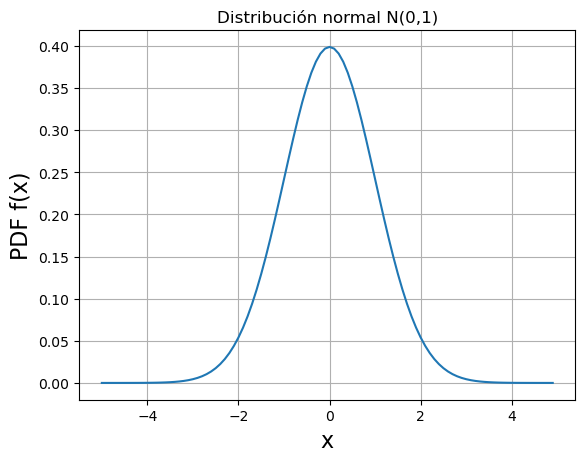

In [18]:
#solucion
# Generate the data
x = np.arange(-5,5,0.1)
# Plot a normal distribution: "Probability density functions"
mu = 0
sigma = 1
y = stats.norm(loc=mu, scale=sigma).pdf(x)
plt.plot(x,y)
#y2 = stats.norm(mu, 2*sigma).pdf(x)
#plt.plot(x,y2,'r')
plt.title('Distribución normal N(0,1)')
plt.xlabel("x",fontsize=16)
plt.ylabel("PDF f(x)",fontsize=16)
#plt.legend()
plt.grid()
plt.show()

## CDF

Cumulative distribution function 

CDF F(x)=P(X<=x)=q (q son quantiles)

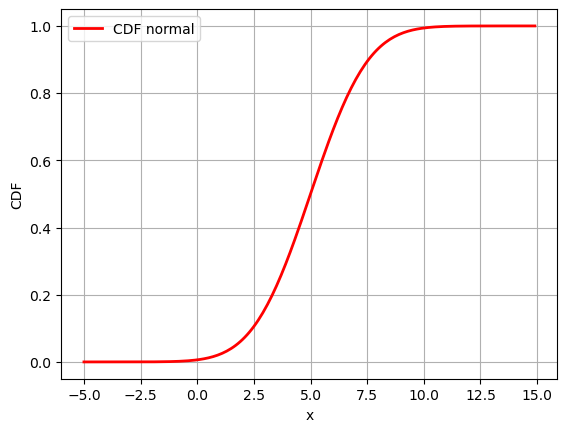

In [19]:
# Generate the data
x = np.arange(-5,15,0.1)
# Plot a normal distribution: "Probability density functions"
mu = 5
sigma = 2
#CDF F(x)=P(X<=x)=q (q son quantiles)
plt.plot(x, stats.norm.cdf(x, mu, sigma), 'r',linewidth=2, label='CDF normal')
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

## PPF 

Percent point function (inverse of cdf — percentiles)

inv(CDF) F^(-1)(q)=x

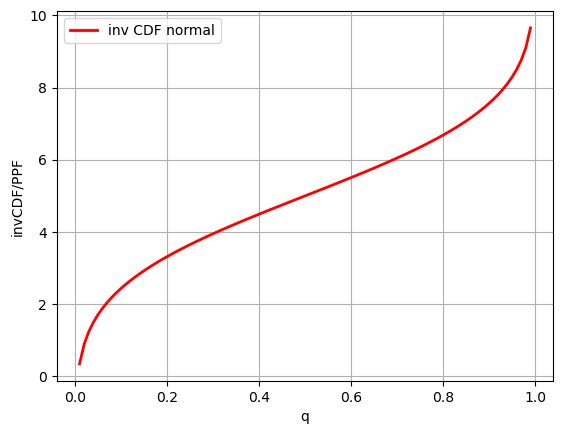

In [20]:
#inv(CDF) F^(-1)(q)=x, ppf ->Percent point function (inverse of cdf — percentiles).
x = np.arange(0,1,0.01)
plt.plot(x, stats.norm.ppf(x, mu, sigma), linewidth=2, color='r', label='inv CDF normal')
plt.xlabel("q")
plt.ylabel("invCDF/PPF")
plt.legend()
plt.grid()
plt.show()

#### **[Ejercicio] Vida media de una bombilla**

Sabiendo que una bombilla tiene una vida media de 10000 horas con una desviación de 500 horas. Asumiendo una distribución normal, determina: 


* Probabilidad de que una bombilla se rompa antes de 500 horas. 


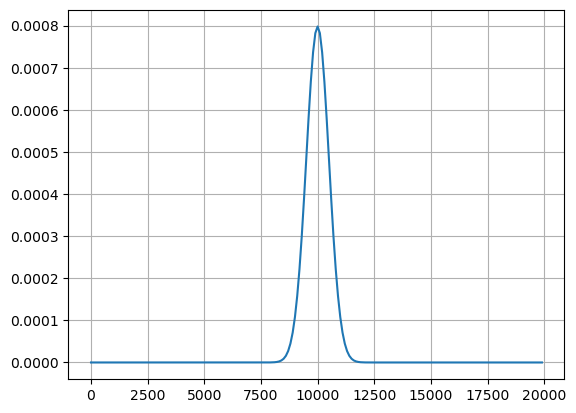

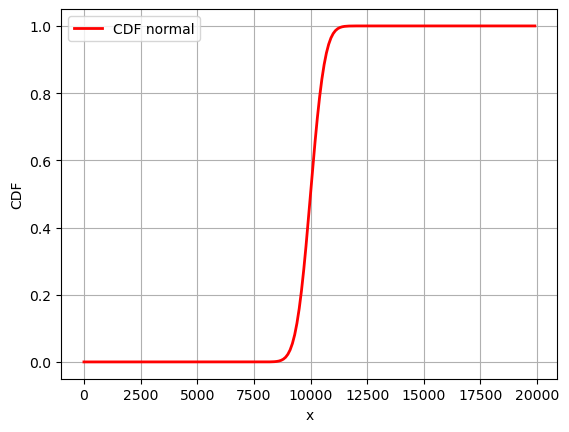

In [21]:
#solucion
mu=10000
sigma=500

x = np.arange(0,20000,100)
y = stats.norm.pdf(x,mu, sigma)
plt.plot(x,y)
plt.grid()
plt.show()

plt.plot(x, norm.cdf(x, mu, sigma), linewidth=2, color='r', label='CDF normal')
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

In [22]:
# solucion
print("P(X<=500)=",norm.cdf(x=500, loc=mu, scale=sigma))

P(X<=500)= 8.527223952630975e-81


* Probabilidad de que una bombilla se rompa después de 20000 horas. 

In [23]:
# solucion
print("1-P(X<=20000)=",1-norm.cdf(x=20000, loc=mu, scale=sigma))

1-P(X<=20000)= 0.0


* Valor en horas mínimo que garantiza que funcionan el 50% de las bombillas

In [24]:
q=0.5 #lower tail probability
#P(X<=x)=q --> P(X>x)=1-q
print("P(X>¿x?)=1-0.5, x=",norm.ppf(q=1-0.5, loc=mu, scale=sigma))

P(X>¿x?)=1-0.5, x= 10000.0


* Valor en horas mínimo que garantiza que funcionan el 99% de las bombillas

In [25]:
#print(f"P(X>%.0f)={1-0.5}" % norm.ppf(q=1-0.5, loc=mu, scale=sigma)) #print más elaborado
print("P(X>¿x?)=1-0.99, x=",norm.ppf(q=1-0.99, loc=mu, scale=sigma))

P(X>¿x?)=1-0.99, x= 8836.82606297958


In [26]:
#otros ejemplos
#Prob. de estar entre una desv. estándar alrededor de la media
x1=mu-sigma
x2=mu+sigma
#print("P(x-sigma<x<=x+sigma)=",norm.cdf(x2, mu, sigma)-norm.cdf(x1, mu, sigma))
print(f"P({x1}<x<={x2})=",norm.cdf(x2, mu, sigma)-norm.cdf(x1, mu, sigma))
x1=mu-2*sigma
x2=mu+2*sigma
print(f"P({x1}<x<={x2})=",norm.cdf(x2, mu, sigma)-norm.cdf(x1, mu, sigma))
x1=mu-3*sigma
x2=mu+3*sigma
print(f"P({x1}<x<={x2})=",norm.cdf(x2, mu, sigma)-norm.cdf(x1, mu, sigma))
# representación N(nu,sigma)


P(9500<x<=10500)= 0.6826894921370859
P(9000<x<=11000)= 0.9544997361036416
P(8500<x<=11500)= 0.9973002039367398


## Distribuciones a partir de la normal

Distribución Chi-Cuadrado $\chi^2_{df}$ 

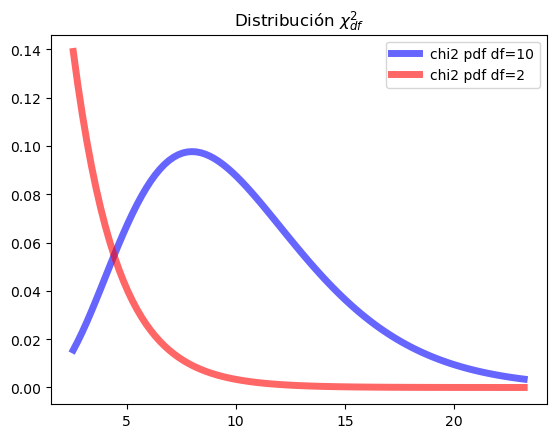

In [27]:
# chi2
df = 10
x = np.linspace(stats.chi2.ppf(0.01, df),stats.chi2.ppf(0.99, df), 100)
plt.plot(x, stats.chi2.pdf(x, df),'b-', lw=5, alpha=0.6, label='chi2 pdf df=10')
df = 2
plt.plot(x, stats.chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf df=2')
plt.legend()
plt.title("Distribución $\chi^2_{df}$")
plt.show()

#mean, var, skew, kurt = stats.chi2.stats(df, moments='mvsk')
#print(mean, var, skew, kurt)

Distribución t-student $t_{df}$

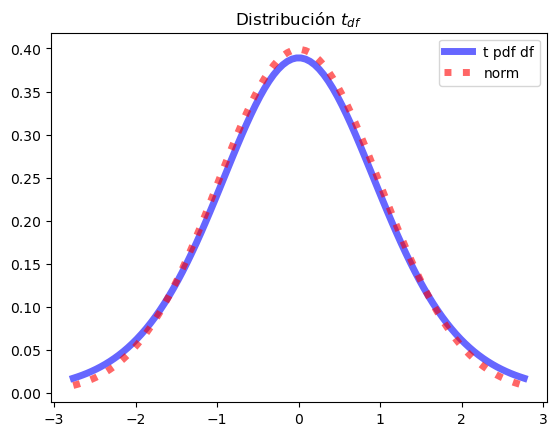

In [28]:
# t-student
df=10
x = np.linspace(stats.t.ppf(0.01, df),stats.t.ppf(0.99, df), 100)
plt.plot(x, stats.t.pdf(x, df),'b-', lw=5, alpha=0.6, label='t pdf df')
plt.plot(x, stats.norm.pdf(x),'r:', lw=5, alpha=0.6, label='norm')
plt.legend()
plt.title("Distribución $t_{df}$")
plt.show()

Distribución F, $F_{dfn,dfd}$

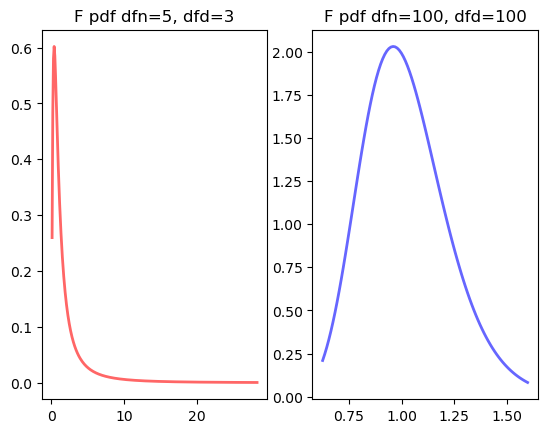

In [29]:
# F
fig, ax = plt.subplots(1, 2)
#plt.title("Distribución $F_{dfn,dfd}$")
dfn, dfd = 5,3
x = np.linspace(stats.f.ppf(0.01, dfn, dfd),stats.f.ppf(0.99, dfn, dfd), 300)
ax[0].plot(x, stats.f.pdf(x, dfn, dfd),'r-', lw=2, alpha=0.6, label='F pdf dfn=5, dfd=3')
ax[0].set_title('F pdf dfn=5, dfd=3')
#plt.show()
dfn, dfd = 100,100
x = np.linspace(stats.f.ppf(0.01, dfn, dfd),stats.f.ppf(0.99, dfn, dfd), 100)
ax[1].plot(x, stats.f.pdf(x, dfn, dfd),'b-', lw=2, alpha=0.6, label='F pdf dfn=100, dfd=100')
ax[1].set_title('F pdf dfn=100, dfd=100')

plt.show()

## Población y muestra


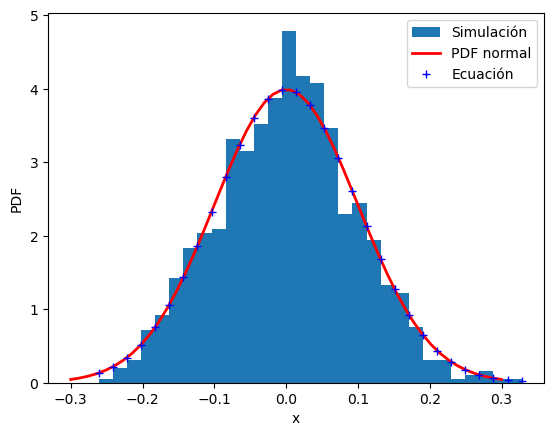

In [30]:
from scipy.stats import norm

mu, sigma = 0, 0.1 # media y desviación estándar
size=1000
#s = np.random.default_rng().normal(mu, sigma, size)
s= stats.norm.rvs(mu, sigma, size)
#histogram
count, bins, ignored = plt.hist(s, 30, density=True, label='Simulación')
#pdf
x = np.linspace(mu-3*sigma, mu+3*sigma)
plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2, color='r', label='PDF normal')
#equation
normal = plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),'+',color='b', label='Ecuación')

plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.show()

#### **[Ejercicio] Ley de los grandes números**
Comprueba que conforme aumentas el número de valores de x, el promedio tiende al valor esperado

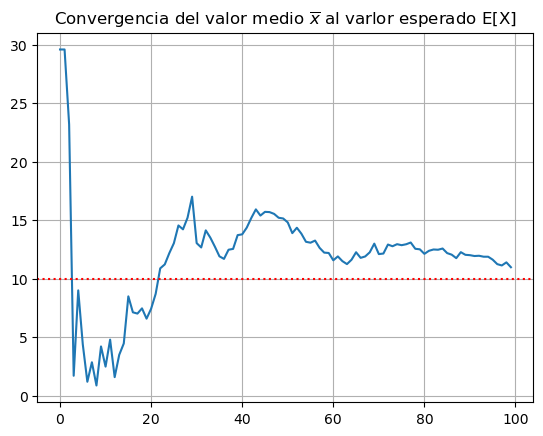

In [31]:
mu, sigma = 10, 30 # media y desviación estándar
size=100
x=stats.norm.rvs(mu, sigma, size) #Random variates.
x[0] #primer valor   
x[0:5] #primeros valores

#solución
x_mean=np.zeros(size) #definir el tamaño del x_mean
x_mean[0]=x[0] #inicialización
for i in range(1,size): #bucle i desde 2 hasta size
    x_mean[i]=np.mean(x[0:i]) # x_mean[i] se calcula con la media de las i primeras muestras

#dibujamos x_mean
plt.plot(x_mean)
plt.axhline(y=mu,color="r",linestyle=":")
plt.title("Convergencia del valor medio $\overline{x}$ al varlor esperado E[X]")
plt.grid()
plt.show()

## Teorema del límite central


#### **[Ejercicio] Distribución del valor medio**

Queremos obtener la distribución del valor medio del nivel de hemoglobina en sangre de la población mundial. 
* De una variable *hb* aleatoria normal obtén 10 valores de media 10 g/dl y una desviación de 2 g/dl. 
* Calcula el valor medio y almacena el resultado en hb_media.
* Repite el proceso r=100 veces. 
* Determina el valor medio de hb_media ¿qué valor tiene?
* Determina la desviación estándar de hb_media ¿qué valor tiene? ¿varia con r? 

Valor medio calculado de hb_media:9.98 desviación estándard 0.63)
Valor medio teórico de hb_media:10.00 desviación estándard 0.63)


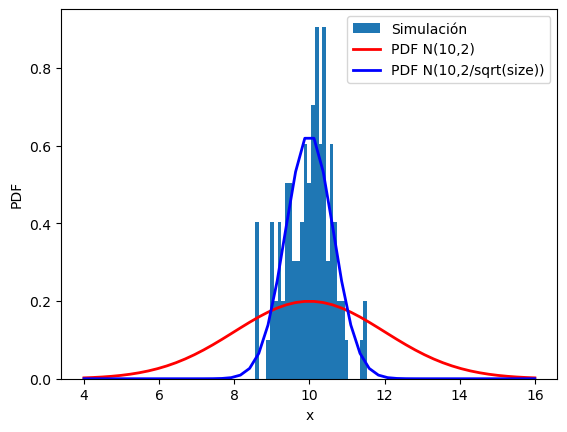

In [32]:
#solución
m=10
sigma=2
r=100
size=10
x_mean_mean=np.zeros(r)
for i in range(0,r): #para evitar el warning del mean
    x=stats.norm.rvs(mu,sigma,size)
    #x=stats.poisson.rvs(mu,size=size) #rvs(mu, loc=0, size=1, random_state=None)
    x_mean_mean[i]=np.mean(x)

print(f"Valor medio calculado de hb_media:{np.mean(x_mean_mean):.2f} desviación estándard {np.std(x_mean_mean):.2f})")
print(f"Valor medio teórico de hb_media:{m:.2f} desviación estándard {sigma/np.sqrt(size):.2f})")

#extra 
#hist
count, bins, ignored = plt.hist(x_mean_mean, 30, density=True, label='Simulación')
#pdf
x = np.linspace(mu-3*sigma, mu+3*sigma)
plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2, color='r', label='PDF N(10,2)')
plt.plot(x, norm.pdf(x, mu, sigma/np.sqrt(size)), linewidth=2, color='b', label='PDF N(10,2/sqrt(size))')
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.show()

# Contraste de Hipótesis

#### **[Ejercicio] Motivación**

Para zanjar una disputa, vamos a ayudar a confirmar o desmentir que una de las personas sea mejor que la otra (a la vista de los demás). Determina algunos estadísticos que te aporten información (media, desviación estándar, PDF). 

Puntación para Kim: mean= 67.5 std= 8.616843969807043  n= 12 muestras
Puntación para Sarah: mean= 74.58333333333333 std= 3.522743564641375  n= 12 muestras


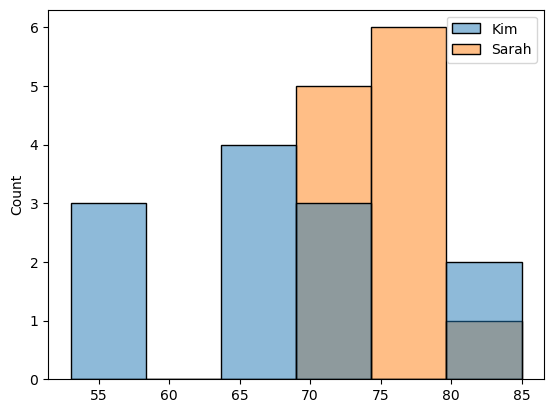

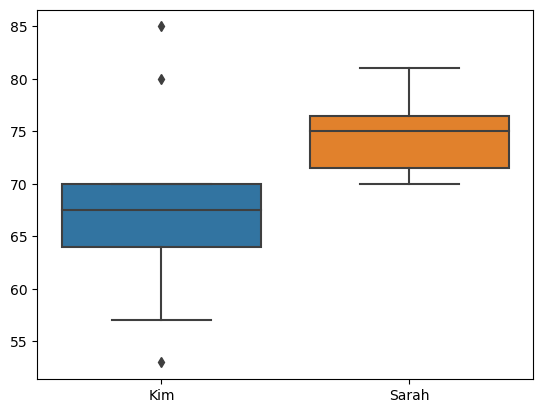

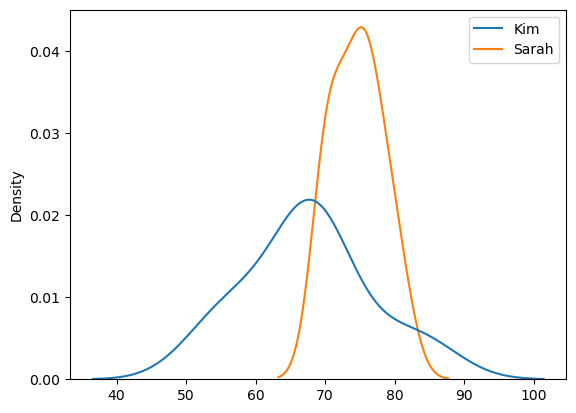

In [30]:
Kim=[53,57,58,66,85,67,67,68,69,70,70,80]
Sarah=[70,70,70,72,73,75,75,76,76,78,79,81]
votaciones = pd.DataFrame({'Kim': Kim, 
                           'Sarah': Sarah})
votaciones.head(5)
#solucion
mKim=np.mean(Kim)
stdKim=np.std(Kim)
print("Puntación para Kim: mean=",mKim,"std=",stdKim," n=",votaciones.shape[0],"muestras")
mSarah=np.mean(Sarah)
stdSarah=np.std(Sarah)
print("Puntación para Sarah: mean=",mSarah,"std=",stdSarah," n=",votaciones.shape[0],"muestras")
sns.histplot(votaciones)
plt.show()
sns.boxplot(data=votaciones)
plt.show()
sns.kdeplot(data=votaciones)
plt.show()

## Valores críticos



#### **[Ejercicio] Determina los valores de $z_{\alpha}$. También $z_{\alpha/2}$ y $z_{1-\alpha/2}$**

In [27]:
alpha=0.05 #area de la pdf -> probabilidad 

#solucion, la definición es al revés para que salga positivo (convenio) 
print("z_alpha:",norm.ppf(1-alpha,0,1)) #confianza unilateral
print("z_alpha/2:",norm.ppf(1-alpha/2)) #sirve para repartir el area en dos lados, confianza bilateral
print("z_1-alpha/2:",norm.ppf(alpha/2)) #sirve para repartir el area en dos lados, confianza bilateral
print("valore más habituales de z_alpha/2")
print("z_alpha/2:",norm.ppf(1-0.05/2)) #sirve para repartir el area en dos lados, confianza bilateral
print("z_alpha/2:",norm.ppf(1-0.01/2)) #sirve para repartir el area en dos lados, confianza bilateral
print("z_alpha/2:",norm.ppf(1-0.001/2)) #sirve para repartir el area en dos lados, confianza bilateral
print("valore más habituales de z_alpha")
print("z_alpha/2:",norm.ppf(1-0.05)) #sirve para repartir el area en dos lados, confianza bilateral
print("z_alpha/2:",norm.ppf(1-0.01)) #sirve para repartir el area en dos lados, confianza bilateral
print("z_alpha/2:",norm.ppf(1-0.001)) #sirve para repartir el area en dos lados, confianza bilateral

z_alpha: 1.6448536269514722
z_alpha/2: 1.959963984540054
z_1-alpha/2: -1.9599639845400545
valore más habituales de z_alpha/2
z_alpha/2: 1.959963984540054
z_alpha/2: 2.5758293035489004
z_alpha/2: 3.2905267314919255
valore más habituales de z_alpha
z_alpha/2: 1.6448536269514722
z_alpha/2: 2.3263478740408408
z_alpha/2: 3.090232306167813


## Intervalo de confianza

#### **[Ejercicio] Determina el intervalo de confianza de la media**

Determina el intervalo de confianza al 99% de cada una de las votaciones. 

In [32]:
confianza=99/100

#solucion
n=x.shape[0]

x=votaciones["Kim"]
alpha=1-confianza
z_alpha_2=stats.norm.ppf(1-alpha/2,0,1)
x_inf=np.mean(x)-z_alpha_2*np.std(x)/np.sqrt(n) #lower 5% quantile of X
x_sup=np.mean(x)+z_alpha_2*np.std(x)/np.sqrt(n)
print("El valor real de Kim está en el intervalo (",x_inf,",",x_sup,")con ",100*confianza, "% de confianza")

y=votaciones["Sarah"]
y_inf=np.mean(y)-z_alpha_2*np.std(y)/np.sqrt(n)
y_sup=np.mean(y)+z_alpha_2*np.std(y)/np.sqrt(n)
print("El valor real de Sarah está en el intervalo (",y_inf,",",y_sup,")con ",100*confianza, "% de confianza")

#extra información
media_Kim=np.mean(x)
media_Sarah=np.mean(y)
std_Kim=np.std(x)
std_Sarah=np.std(y)
SE_x=np.std(x)/np.sqrt(n)
SE_y=np.std(y)/np.sqrt(n)

#https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.zconfint.html#statsmodels.stats.weightstats.zconfint
import statsmodels.stats as sms
sms.weightstats.zconfint(x, alpha=alpha, alternative='two-sided', usevar='pooled', ddof=1)
sms.weightstats.zconfint(x, alpha=alpha, alternative='two-sided', usevar='pooled', ddof=0)

El valor real de Kim está en el intervalo ( 61.09270550709437 , 73.90729449290562 )con  99.0 % de confianza
El valor real de Sarah está en el intervalo ( 71.96389917382739 , 77.20276749283927 )con  99.0 % de confianza


(61.09270550709437, 73.90729449290562)

#### **[Ejercicio] Determina el intervalo de confianza al 99% de una proporción**

Se realizan 10 pruebas PCR por cada una de las 50 provincias y se registran los resultados. Suponiendo 47 millones de personas ¿cuántas podrían estar infectadas?

In [33]:
#https://www.statsmodels.org/stable/stats.html
nPCR_positiva=np.array([4,6,4,5,0,7,1,1,1,4,6,0,3,1,2,5,5,2,4,5,1,2,3,4,1,2,4,0,3,0,3,3,5,5,4,3,6,2,3,6,3,0,2,6,5,0,3,1,2,1])
nPCR_por_provincia=10
n_provincias=50

#solucion
#https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportion_confint.html#statsmodels.stats.proportion.proportion_confint
n=47e+6
alpha=0.01

ci_low, ci_upp = sm.stats.proportion_confint(np.sum(nPCR_positiva), n_provincias*nPCR_por_provincia, alpha, method='agresti_coull')
print(ci_low, ci_upp)
print("población infectada al 99 por ciento (%1.3e,%1.3e) " % (ci_low*n, ci_upp*n))
#Nota: hemos inventado la prevalencia de cada provincia mediante una distribución normal centrada en 0.3 y desviación 0.1.

#comparamos con la aproximación normal
#ci_low, ci_upp = proportion_confint(count, nobs, alpha=0.05, method='normal')
ci_low_n, ci_upp_n = sm.stats.proportion_confint(np.sum(nPCR_positiva), n_provincias*nPCR_por_provincia, alpha, method='normal')
#ci_low_n, ci_upp_n = sms.proportion.proportion_confint(np.sum(nPCR_positiva), n_provincias*nPCR_por_provincia, alpha, method='normal')
print(ci_low_n, ci_upp_n)
print("población infectada al 99 por ciento (%1.3e,%1.3e) " % (ci_low_n*n, ci_upp_n*n))

#diferencia de personas entre ambas aproximaciones (20k personas!!!!)
n*((ci_upp_n-ci_low_n)-(ci_upp-ci_low))


0.24817123058490398 0.3531195581957265
población infectada al 99 por ciento (1.166e+07,1.660e+07) 
0.2453123576282401 0.35068764237175987
población infectada al 99 por ciento (1.153e+07,1.648e+07) 


20066.98523677064

## Significancia de una prueba

#### **[Ejercicio] Significancia (p-valor) de la comparación**

Determina la probabilidad de que nos equivoquemos al asumir que la valoración en la votación es la misma para ambas contrincantes. ¿Rechazamos que ambas tengan la misma valoración? ¿es una mejor que la otra?

z_stat: -3.5699268172503587
P(valoración de Kim sea todavía mayor que la de Sarah suponiendo que ambas están igualmente valoradas)
P(z<z_stats|H0)= 0.00017854048577460485


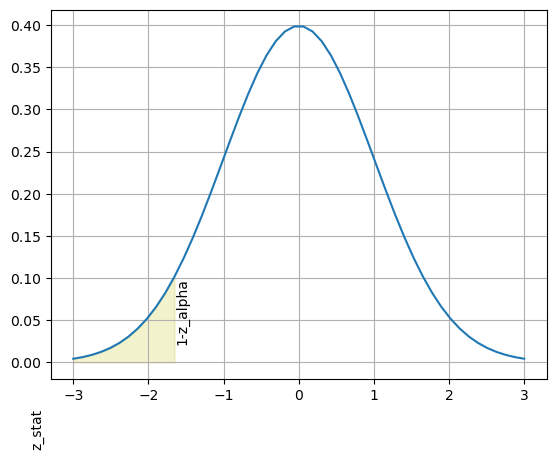

P(encontrar una valoración más diferente de la actual suponiendo que ambas están igualmente valoradas)
P(z<-abs(z_stats) o z>abs(z_stats)|HO) 0.0003570809715492097


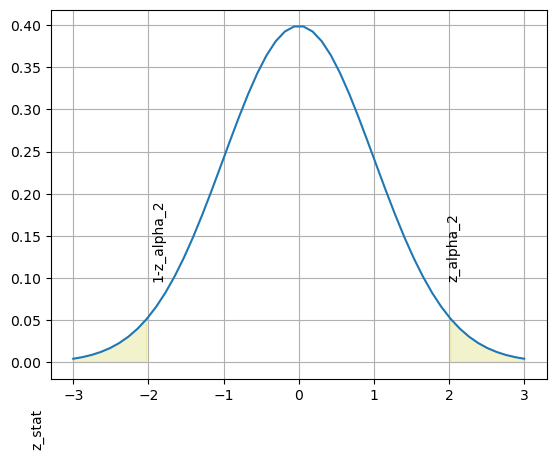

In [29]:
x=votaciones["Kim"]
y=votaciones["Sarah"]

#solucion

alpha=0.05
z_alpha=stats.norm.ppf(1-alpha,0,1)
z_alpha_2=stats.norm.ppf(1-alpha/2,0,1)

# media_Kim=votaciones[["Kim"]].mean()
# std_Kim=votaciones[["Kim"]].std()
# media_Sarah=votaciones[["Sarah"]].mean()
# std_Sarah=votaciones[["Sarah"]].std()
# n=votaciones.shape[0]
# z_stat=(np.mean(x)-np.mean(y))/(np.sqrt(np.var(x)/n+np.var(y)/n))

# Contraste unilateral: Cola por la izquierda
# H0 mediaKIM>=mediaSarah, por la derecha no rechazamos porque se se cumpliría H0, es decir,  x-y >0 Kim-Sarah
# H1 mediaKIM<mediaSarah, rechazamos por la izquierda porque se cumpliría que x-y <0 

n=votaciones.shape[0]
z_stat=(np.mean(x)-np.mean(y))/(np.sqrt(np.var(x)/n+np.var(y)/n))#z_stat: -2.6358437148491367
#z_stat=(np.mean(x)-np.mean(y))/np.sqrt(np.var(x-y)/n) #z_stat: -3.5699268172503587 no es correcto porque son dos poblaciones no 
print("z_stat:",z_stat)
print("P(valoración de Kim sea todavía mayor que la de Sarah suponiendo que ambas están igualmente valoradas)") #unilateral
print("P(z<z_stats|H0)=", stats.norm.cdf(z_stat)) #P(z<=z_stats) #unilateral 

xx=np.linspace(-3,3)
yy=norm.pdf(xx)
plt.plot(xx,yy)
plt.fill_between(x= xx, y1= yy,color= "r",alpha= 1, where= (xx < -abs(z_stat))) 
plt.fill_between(x= xx, y1= yy,color= "y",alpha= 0.2, where= (xx < -z_alpha)) 
plt.text(-z_alpha, +0.025, "1-z_alpha",rotation="vertical") 
plt.text(z_stat, -0.1, "z_stat",rotation="vertical")
plt.grid()
plt.show()

# Contraste bilateral: Cola por los los dos lados
# H0 mediaKIM=mediaSarah, 
# H1 mediaKIM<>mediaSarah,
print("P(encontrar una valoración más diferente de la actual suponiendo que ambas están igualmente valoradas)") #bilateral
print("P(z<-abs(z_stats) o z>abs(z_stats)|HO)", 2*stats.norm.cdf(z_stat)) #P(|z|>|z_stats||HO) #bilateral  #unilateral H1: mediaKIM<>mediaSarah

xx=np.linspace(-3,3)
yy=norm.pdf(xx)
plt.plot(xx,yy)
plt.fill_between(x= xx, y1= yy,color= "r",alpha= 1, where= (xx < -abs(z_stat) )|(xx > abs(z_stat)))
plt.fill_between(x= xx, y1= yy,color= "y",alpha= 0.2, where= (xx < -z_alpha_2 )|(xx > z_alpha_2)) 
plt.text(z_stat, -0.1, "z_stat",rotation="vertical") 
plt.text(z_alpha_2, +0.1, "z_alpha_2",rotation="vertical") 
plt.text(-z_alpha_2, +0.1, "1-z_alpha_2",rotation="vertical") 
plt.grid()
plt.show()

In [43]:
#nueva explicaccion
x=votaciones["Kim"]
y=votaciones["Sarah"]
alpha=0.05
n=len(x)
z_alpha=stats.norm.ppf(1-alpha,0,1)
z_alpha_2=stats.norm.ppf(1-alpha/2,0,1)
z_stats=(np.mean(x)-np.mean(y))/(np.sqrt(np.var(x)/n+np.var(y)/n))
p_valor=stats.norm.cdf(z_stat)
#Contraste bilateral
print(f"Zona de No rechazo ({-z_alpha_2:1.2f},{z_alpha_2:1.2f}). z_stats={z_stats:1.2f}")
print(f"P(|z|>z_stats|HO)={2*p_valor}")

#Contraste unilateral: Cola izquierda
print(f"Zona de No rechazo ({-z_alpha:1.2f},+Inf). z_stats={z_stats:1.2f}")
print(f"P(z<z_stats)|HO)={p_valor}")

Zona de No rechazo (-1.96,1.96). z_stats=-2.64
P(|z|>z_stats|HO)=0.0003570809715492097
Zona de No rechazo (-1.64,+Inf). z_stats=-2.64
P(z<z_stats)|HO)=0.00017854048577460485


#### **[Ejercicio] Interpreta la matriz de confusión.**

Dada la matriz de confusión:    
* intervalo confianza del acierto (accuracy)
* los p-values que compara el acierto, ACC, y NIR (no information rate)

<img src="Matriz_Confusion.png" height="300">

In [ ]:
#solucion
count = np.array([167,86]) #los que realmente acertamos con respecto a decir siempre que no (mayoritario)
nobs = np.array([170,170])
alpha = .05 #significancia

# interpretamos P-value[ACC>NIR]
print("H0:ACC=NIR")
stat, pval = sm.stats.proportions_ztest(count, nobs, alpha, alternative="larger")
print("P[ACC<NIR |H0]", pval)
#stat, pval = sm.stats.proportions_ztest(count, nobs, alpha,alternative="two-sided" )
#print("P[ACC>NIR o ACC<NIR |H0]",pval)
#stat, pval = sm.stats.proportions_ztest(count, nobs, alpha,alternative="smaller" )
#print("P[ACC>NIR |H0]",pval)

#intervalo confianza

#calculo a mano
alpha = .05
n=170
p=167/170
SE=np.sqrt(p*(1-p)/n)
z_alpha_2=1.96
print("a mano: %1.3f (%1.3f,%1.3f)" % (p,p-z_alpha_2*SE,p+z_alpha_2*SE))

#intervalo confianza con funciones de sm.stats
#ci_low, ci_upp = sm.stats.proportion_confint(167,170, alpha,method='binom_test') #no funciona, justo el que dice caret :-)
#print("intervalo binom_test  %1.3f (%1.3f,%1.3f) " % (p,ci_low, ci_upp))

ci_low, ci_upp = sm.stats.proportion_confint(167,170, alpha,method='agresti_coull')
print("intervalo agresti_coull  %1.3f (%1.3f,%1.3f) " % (p,ci_low, ci_upp))

ci_low, ci_upp = sm.stats.proportion_confint(167,170, alpha)
print("intervalo aproximacion normal (truncada)  %1.3f (%1.3f,%1.3f) " % (p,ci_low, ci_upp))


## Tamaño del efecto 

El tamaño del efecto se puede calcular con `compute_effsize` de la librería `pingouin`

https://pingouin-stats.org/build/html/index.html

In [ ]:
#conda install -c conda-forge pingouin
#pip install pingouin
# !pip install pingouin #para los de colab
import pingouin as pg
x = [1, 2, 3, 4]
y = [3, 4, 5, 6, 7]
pg.compute_effsize(x, y, paired=False, eftype='cohen')

#### **[Ejercicio] Calcula el tamaño del efecto de la votación**

¿La diferencia es pequeña, mediana, grande?


In [ ]:
#solucion
x=votaciones["Kim"]
y=votaciones["Sarah"]
dcohen=pg.compute_effsize(x,y, paired=False, eftype='cohen')

dcohen2=pg.compute_effsize(y,x, paired=False, eftype='cohen')
print("El tamaño del efecto en la comparación es entre grande y muy grande. d-cohen: %1.3f" % dcohen2)

dcohen_cles=pg.compute_effsize(y,x, paired=False, eftype='cles')
ghedges=pg.compute_effsize(y,x, paired=False, eftype='hedges')
print(" d-cohen %3.3f g-hedges %3.3f CLES %3.3f" % (dcohen2, ghedges,dcohen_cles))
# el tamaño del efecto es entre grande y muy grande. CLES indica que en el 81% de las ocasiones gana una de las dos contrincantes

## Análisis de Potencia


**[Ejercicio] Potencia del contraste**

Utilizando las funciones de `statsmodels.stats.power`

`power_analysis = TTestIndPower()`
`power_analysis.solve_power(effect_size = , nobs1=, alpha = , power = , alternative = 'two-sided')` 

se puede calcular la variable la potencia $1-\beta$ del contraste. 

* Determina la potencia de la comparación de las votaciones.
* ¿Cuántas encuestas serían necesarias para obtener una potencia de 0.9?



In [44]:
from statsmodels.stats.power import TTestIndPower
power_analysis = TTestIndPower() # Initiate the power analysis

#solucion 
dcohen2=pg.compute_effsize(y,x, paired=False, eftype='cohen')

#potencia
PA = power_analysis.solve_power(effect_size = dcohen2, nobs1=20, alpha = 0.05, alternative = 'two-sided')
print('La potencia esperada será de', PA)

# sample size
sample_size = power_analysis.solve_power(effect_size = dcohen2, alpha = 0.05, power = 0.9, alternative = 'two-sided')
print('El tamaño necesario para alcanzar la potencia será de ', round(sample_size))


La potencia esperada será de 0.8877510302185482
El tamaño necesario para alcanzar la potencia será de  21


# Pruebas más importantes

Según el enlace: 

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

Las pruebas más utilizadas en aprendizaje máquina son: 

    Normality Tests
        Shapiro-Wilk Test
        D’Agostino’s K^2 Test
        Anderson-Darling Test
    Parametric Statistical Hypothesis Tests
        Student’s t-test
        Paired Student’s t-test
        Analysis of Variance Test (ANOVA)
        Repeated Measures ANOVA Test
    Nonparametric Statistical Hypothesis Tests
        Mann-Whitney U Test
        Wilcoxon Signed-Rank Test
        Kruskal-Wallis H Test
        Friedman Test
    Correlation Tests
        Pearson’s Correlation Coefficient
        Spearman’s Rank Correlation
        Kendall’s Rank Correlation
        Chi-Squared Test
    Stationary Tests
        Augmented Dickey-Fuller
        Kwiatkowski-Phillips-Schmidt-Shin

## Pruebas de normalidad

### Kolmogorov-Smirnov 

Tests whether a data sample has a Gaussian or other distribution.

Assumptions

    Observations in each sample are independent and identically distributed (iid).

Interpretation

    H0: the sample has a Gaussian or other distribution.
    H1: the sample does not have a Gaussian or other  distribution.


In [124]:
# Example of the Kolmogorov-Smirnov  Normality Test
from scipy.stats import kstest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = kstest(data, 'norm')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.328, p=0.186
Probably Gaussian


**[Ejercicio] Comparación de distribuciones**

Interpreta el resultado del siguiente código. 

KstestResult(statistic=0.12280701754385964, pvalue=0.3980725450071369)

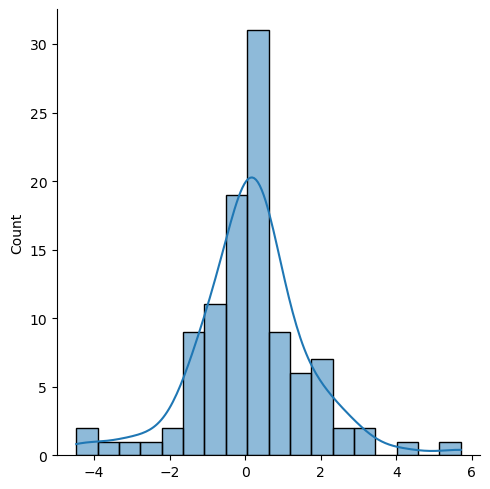

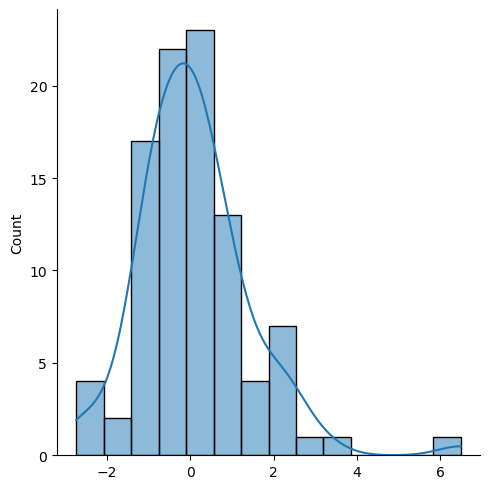

In [127]:
from scipy import stats
from numpy.random import seed
seed(0)
rng = np.random.default_rng()
sample1 = stats.laplace.rvs(size=105, random_state=rng)
sample2 = stats.laplace.rvs(size=95, random_state=rng)

sns.displot(sample1, kde=True)
sns.displot(sample2, kde=True)

stats.kstest(sample1, sample2)
# H0: pdf(sample1)=pdf(sample2)
#if pvalue < alpha=0.05 then Rechazamos HO: Distribuciones de sample1 y sample 2 son .... iguales
#if pvalue > alpha=0.05 then NO Rechazamos HO. Asumimos que son iguales. 

### Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

    Observations in each sample are independent and identically distributed (iid).

Interpretation

    H0: the sample has a Gaussian distribution.
    H1: the sample does not have a Gaussian distribution.


In [128]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


#### **[Ejercicio] Gráfico QQ-plot**

Representa el gráfico `qqplot` de la librería `statsmodels.api` para ambos conjuntos de datos.

ShapiroResult(statistic=0.9926937818527222, pvalue=0.8689165711402893)
ShapiroResult(statistic=0.9360561966896057, pvalue=0.00011169587378390133)


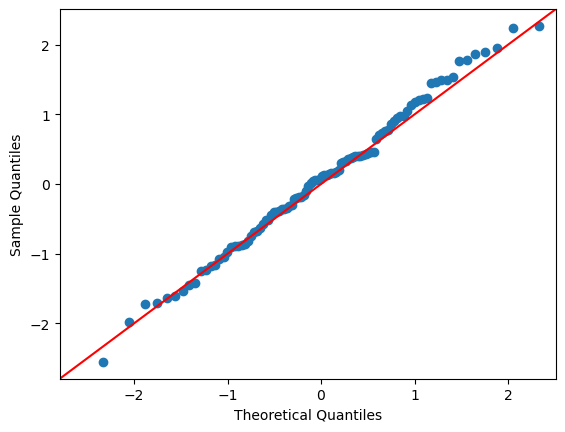

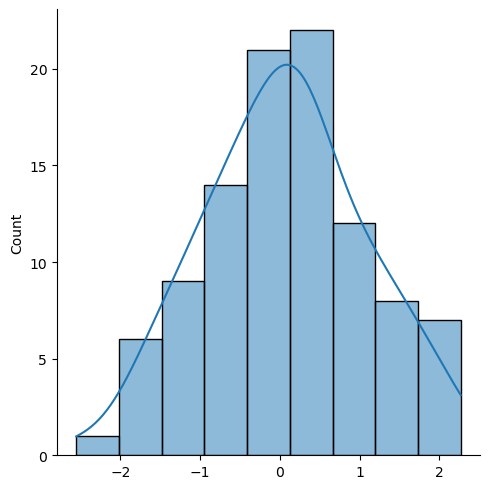

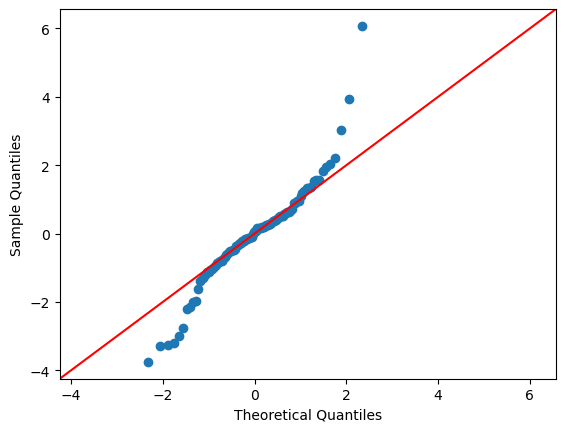

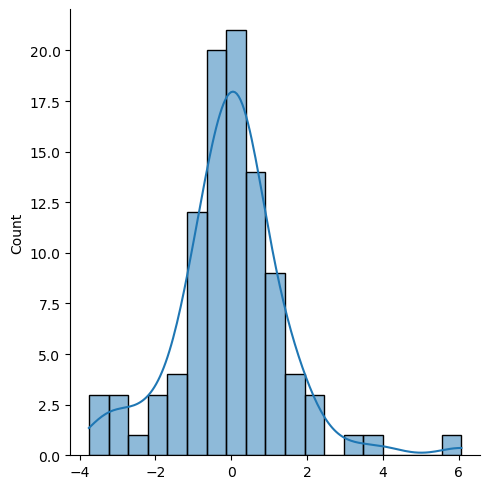

In [129]:
from numpy.random import seed
from numpy.random import randn
seed(0)
data = randn(100) #generate dataset of 100 random values that follow a standard normal distribution
data2 =stats.laplace.rvs(size=100)

#solucion 
sm.qqplot(data,line="45")
sns.displot(data, kde=True)
print(stats.shapiro(data))

sm.qqplot(data2,line="45")
sns.displot(data2, kde=True)
print(stats.shapiro(data2))

#### **[Ejercicio] Registros de bautismo del Dr. Arbuthnot (paramétrico)**

El conjunto de datos de Arbuthnot hace referencia al Dr. John Arbuthnot, un médico, escritor y matemático del siglo XVIII. Estaba interesado en la proporción de niños y niñas recién nacidos, por lo que reunió los registros de bautismo de los niños nacidos en Londres para cada año desde 1629 hasta 1710. 

* Determina si el nacimiento de los niños sigue una distribución normal. 
* Determina si el nacimiento de las niñas sigue una distribución normal. 

stat=0.928, p=0.000
stat=0.937, p=0.001


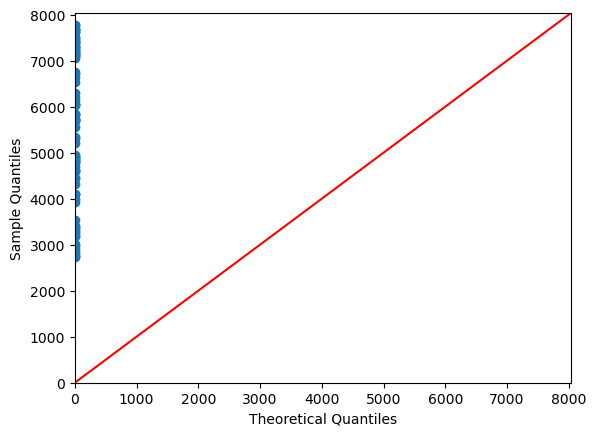

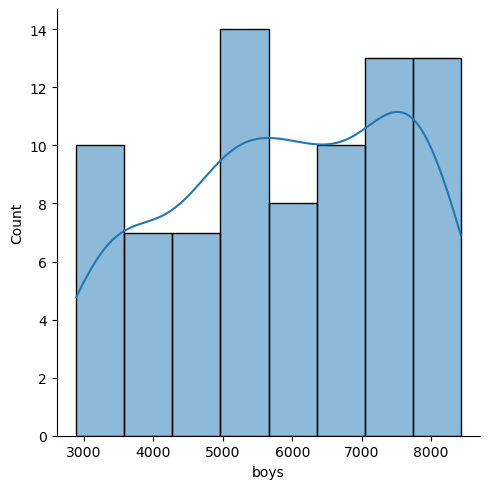

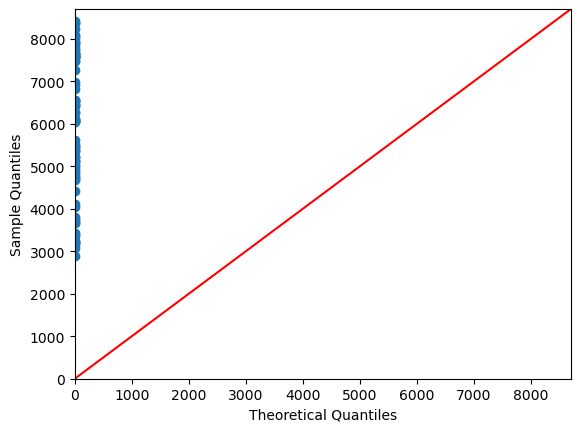

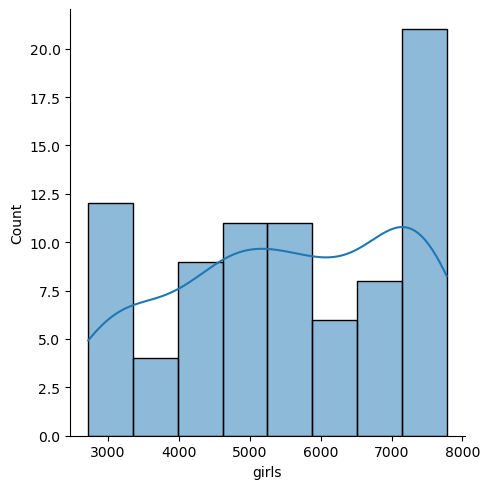

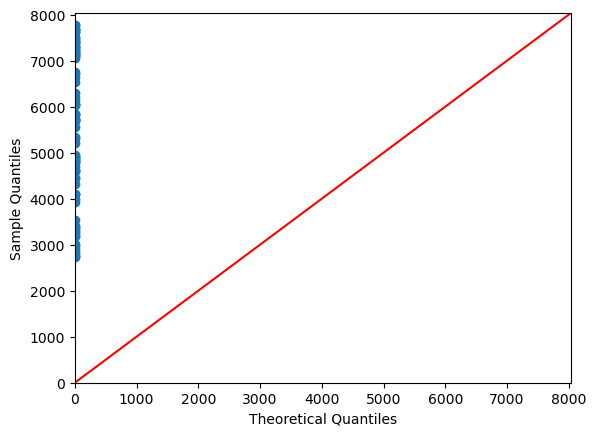

In [133]:
arbuthnot = pd.read_csv('arbuthnot.csv') #arbuthnot[["girls", "boys"]]
arbuthnot.head(4)

#solucion 
stat, p = stats.shapiro(arbuthnot["girls"])
print('stat=%.3f, p=%.3f' % (stat, p))
stat, p = stats.shapiro(arbuthnot["boys"])
print('stat=%.3f, p=%.3f' % (stat, p))

data=arbuthnot["boys"]
sns.displot(data, kde=True)
sm.qqplot(data, line ='45')

data=arbuthnot["girls"]
sns.displot(data, kde=True)
sm.qqplot(data, line ='45')

## Parametric Statistical Hypothesis Tests

    Student’s t-test
    Paired Student’s t-test
    Analysis of Variance Test (ANOVA)
    Repeated Measures ANOVA Test

### Student’s t-test

Tests whether the means of two independent samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

Interpretation

    H0: the means of the samples are equal.
    H1: the means of the samples are unequal.


In [ ]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

#### **[Ejercicio] Registros de bautismo del Dr. Arbuthnot (paramétrico)**

El conjunto de datos de Arbuthnot hace referencia al Dr. John Arbuthnot, un médico, escritor y matemático del siglo XVIII. Estaba interesado en la proporción de niños y niñas recién nacidos, por lo que reunió los registros de bautismo de los niños nacidos en Londres para cada año desde 1629 hasta 1710. 

In [ ]:
arbuthnot = pd.read_csv('arbuthnot.csv')
arbuthnot.head(4)

#solucion
x=arbuthnot["boys"]
y=arbuthnot["girls"]

pg.ttest(x,y,paired=False) #stat, p =stats.ttest_ind(x,y)
#H0: medias son iguales

# comentar que las distribuciones no son normales y no vale el resultado 
# ver el ejercico de Man-Witney 

### Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    Observations across each sample are paired.

Interpretation

    H0: the means of the samples are equal.
    H1: the means of the samples are unequal.


In [5]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


#### **[Ejercicio] Registros de tiempo al realizar 100m lisos (paramétrico)**

10 atletas miden su tiempo al realizar la carrea de 100m lisos antes y después de entrenar durante un año con un entrenador muy caro. ¿han mejorado? 

Utiliza la librería `pingouin`

In [10]:
import pingouin as pg 

antes = [12.9, 13.5, 12.8, 15.6, 17.2, 19.2, 12.6, 15.3, 14.4, 11.3]
despues = [12.7, 13.6, 12.0, 15.2, 16.8, 20.0, 12.0, 15.9, 16.0, 11.1]
#solución
#solución
pg.ttest(antes,despues,paired=True)
#pg.ttest(antes,despues,paired=False)

T  dof alternative    p-val          CI95%   cohen-d   BF10  \
T-test -0.213308    9   two-sided  0.83584  [-0.58, 0.48]  0.019375  0.315   

           power  
T-test  0.050347

### Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

Interpretation

    H0: the means of the samples are equal.
    H1: one or more of the means of the samples are unequal.


In [11]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


#### **[Ejercicio] ANOVA Posición**

Determina si la posición es importante para el bateo.

* Comprueba previamente `homoscedasticity`
* Realiza la prueba post-hoc `pairwise_tukey`

Utiliza la librería `pingouin`

In [12]:
posicion =["OF", "IF", "IF", "OF", "IF", "IF", "OF", "OF", "IF", "IF", "OF", "OF", "IF", "OF", "IF", "IF", "IF", "OF", "IF", "OF", "IF", "OF", "IF", "OF", "IF", "DH", "IF", "IF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "IF", "OF", "OF", "IF", "IF", "OF", "OF", "IF", "OF", "OF", "OF", "IF", "DH", "OF", "OF", "OF", "IF", "IF", "IF", "IF", "OF", "IF", "IF", "OF", "IF", "IF", "IF", "OF", "IF", "IF", "OF", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "DH", "OF", "OF", "IF", "IF", "IF", "OF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "OF", "DH", "OF", "IF", "IF", "OF", "OF", "C", "IF", "OF", "OF", "IF", "OF", "IF", "IF", "IF", "OF", "C", "OF", "IF", "C", "OF", "IF", "DH", "C", "OF", "OF", "IF", "C", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "C", "IF", "OF", "OF", "IF", "OF", "IF", "OF", "DH", "C", "IF", "OF", "IF", "IF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "OF", "IF", "IF", "IF", "OF", "OF", "OF", "IF", "IF", "C", "IF", "C", "C", "OF", "OF", "OF", "IF", "OF", "IF", "C", "DH", "DH", "C", "OF", "IF", "OF", "IF", "IF", "IF", "C", "IF", "OF", "DH", "IF", "IF", "IF", "OF", "OF", "C", "OF", "OF", "IF", "IF", "OF", "OF", "OF", "OF", "OF", "OF", "IF", "IF", "DH", "OF", "IF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "IF", "C", "IF", "IF", "C", "IF", "OF", "IF", "DH", "C", "OF", "C", "IF", "IF", "OF", "C", "IF", "IF", "IF", "C", "C", "C", "OF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "C", "IF", "IF", "OF", "C", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "C", "IF", "DH", "IF", "C", "DH", "C", "IF", "C", "OF", "C", "C", "IF", "OF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "OF", "OF", "IF", "OF", "OF", "IF", "IF", "IF", "OF", "C", "IF", "IF", "IF", "IF", "OF", "OF", "IF", "OF", "IF", "OF", "OF", "OF", "IF", "OF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "C", "DH", "OF", "IF", "C", "C", "IF", "C", "IF", "OF", "C", "C", "OF"]
bateo =[0.359, 0.34, 0.33, 0.341, 0.366, 0.333, 0.37, 0.331, 0.381, 0.332, 0.365, 0.345, 0.313, 0.325, 0.327, 0.337, 0.336, 0.291, 0.34, 0.31, 0.365, 0.356, 0.35, 0.39, 0.388, 0.345, 0.27, 0.306, 0.393, 0.331, 0.365, 0.369, 0.342, 0.329, 0.376, 0.414, 0.327, 0.354, 0.321, 0.37, 0.313, 0.341, 0.325, 0.312, 0.346, 0.34, 0.401, 0.372, 0.352, 0.354, 0.341, 0.365, 0.333, 0.378, 0.385, 0.287, 0.303, 0.334, 0.359, 0.352, 0.321, 0.323, 0.302, 0.349, 0.32, 0.356, 0.34, 0.393, 0.288, 0.339, 0.388, 0.283, 0.311, 0.401, 0.353, 0.42, 0.393, 0.347, 0.424, 0.378, 0.346, 0.355, 0.322, 0.341, 0.306, 0.329, 0.271, 0.32, 0.308, 0.322, 0.388, 0.351, 0.341, 0.31, 0.393, 0.411, 0.323, 0.37, 0.364, 0.321, 0.351, 0.329, 0.327, 0.402, 0.32, 0.353, 0.319, 0.319, 0.343, 0.288, 0.32, 0.338, 0.322, 0.303, 0.356, 0.303, 0.351, 0.325, 0.325, 0.361, 0.375, 0.341, 0.383, 0.328, 0.3, 0.277, 0.359, 0.358, 0.381, 0.324, 0.293, 0.324, 0.329, 0.294, 0.32, 0.361, 0.347, 0.317, 0.316, 0.342, 0.368, 0.319, 0.317, 0.302, 0.321, 0.336, 0.347, 0.279, 0.309, 0.358, 0.318, 0.342, 0.299, 0.332, 0.349, 0.387, 0.335, 0.358, 0.312, 0.307, 0.28, 0.344, 0.314, 0.24, 0.331, 0.357, 0.346, 0.351, 0.293, 0.308, 0.374, 0.362, 0.294, 0.314, 0.374, 0.315, 0.324, 0.382, 0.353, 0.305, 0.338, 0.366, 0.357, 0.326, 0.332, 0.323, 0.306, 0.31, 0.31, 0.333, 0.34, 0.4, 0.389, 0.308, 0.411, 0.278, 0.326, 0.335, 0.316, 0.371, 0.314, 0.384, 0.379, 0.32, 0.395, 0.347, 0.307, 0.326, 0.316, 0.341, 0.308, 0.327, 0.337, 0.36, 0.32, 0.372, 0.306, 0.305, 0.347, 0.281, 0.281, 0.296, 0.306, 0.343, 0.378, 0.393, 0.337, 0.327, 0.336, 0.32, 0.381, 0.306, 0.358, 0.311, 0.284, 0.364, 0.315, 0.342, 0.367, 0.307, 0.351, 0.372, 0.304, 0.296, 0.332, 0.312, 0.437, 0.295, 0.316, 0.298, 0.302, 0.342, 0.364, 0.304, 0.295, 0.305, 0.359, 0.335, 0.338, 0.341, 0.3, 0.378, 0.412, 0.273, 0.308, 0.309, 0.263, 0.291, 0.359, 0.352, 0.262, 0.274, 0.334, 0.343, 0.267, 0.321, 0.3, 0.327, 0.313, 0.316, 0.337, 0.268, 0.342, 0.292, 0.39, 0.332, 0.315, 0.298, 0.298, 0.331, 0.361, 0.272, 0.287, 0.34, 0.317, 0.327, 0.354, 0.317, 0.311, 0.174, 0.302, 0.302, 0.291, 0.29, 0.268, 0.352, 0.341, 0.265, 0.307, 0.36, 0.305, 0.254, 0.279, 0.321, 0.305, 0.35, 0.308, 0.326, 0.219, 0.23, 0.322, 0.405, 0.321, 0.291, 0.312, 0.357, 0.324]

datos = pd.DataFrame({'posicion': posicion, 
                       'bateo': bateo})
datos

#solucion

#print(datos.groupby("posicion").mean())
result_homoscedasticity=pg.homoscedasticity(datos, dv="bateo", group="posicion")
print(result_homoscedasticity)
aov = pg.anova(dv='bateo', between='posicion', data=datos,detailed=True)
print(aov)
#datos.pairwise_tukey(dv='bateo', between='posicion').round(3)


               W      pval  equal_var
levene  2.605659  0.051799       True
     Source        SS   DF        MS         F     p-unc       np2
0  posicion  0.007557    3  0.002519  1.994349  0.114693  0.018186
1    Within  0.407984  323  0.001263       NaN       NaN       NaN


#### **[Ejercicio] ANOVA Dolor**

Determina si el color del pelo es modifica el umbral de dolor. ¿Entre que colores hay cambios significativos?

In [13]:
import pingouin as pg
import pandas as pd

df = pg.read_dataset('anova')
print(df.head(4))

#solucion
result_homoscedasticity=pg.homoscedasticity(df, dv="Pain threshold", group="Hair color")
print(result_homoscedasticity)
aov = pg.anova(dv='Pain threshold', between='Hair color', data=df,detailed=True)
print(aov)
df.pairwise_tukey(dv='Pain threshold', between='Hair color').round(3)

   Subject   Hair color  Pain threshold
0        1  Light Blond              62
1        2  Light Blond              60
2        3  Light Blond              71
3        4  Light Blond              55
               W      pval  equal_var
levene  0.392743  0.760016       True
       Source           SS  DF          MS         F     p-unc       np2
0  Hair color  1360.726316   3  453.575439  6.791407  0.004114  0.575962
1      Within  1001.800000  15   66.786667       NaN       NaN       NaN


A               B  mean(A)  mean(B)  diff     se      T  \
0     Dark Blond   Dark Brunette     51.2     37.4  13.8  5.169  2.670   
1     Dark Blond     Light Blond     51.2     59.2  -8.0  5.169 -1.548   
2     Dark Blond  Light Brunette     51.2     42.5   8.7  5.482  1.587   
3  Dark Brunette     Light Blond     37.4     59.2 -21.8  5.169 -4.218   
4  Dark Brunette  Light Brunette     37.4     42.5  -5.1  5.482 -0.930   
5    Light Blond  Light Brunette     59.2     42.5  16.7  5.482  3.046   

   p-tukey  hedges  
0    0.074   1.414  
1    0.436  -0.811  
2    0.415   0.982  
3    0.004  -2.337  
4    0.789  -0.627  
5    0.037   2.015

### Repeated Measures ANOVA Test

Tests whether the means of two or more paired samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    Observations across each sample are paired.

Interpretation

    H0: the means of the samples are equal.
    H1: one or more of the means of the samples are unequal.


In [ ]:
import numpy as np
import pandas as pd
  
# Create the data
df = pd.DataFrame({'Cars': np.repeat([1, 2, 3, 4, 5], 4),
                    'Oil': np.tile([1, 2, 3, 4], 5),
                    'Mileage': [36, 38, 30, 29,
                                34, 38, 30, 29,
                                34, 28, 38, 32,
                                38, 34, 20, 44,
                                26, 28, 34, 50]})
# Conduct the repeated measures ANOVA
pg.rm_anova(data=df, dv='Mileage', within='Oil',subject='Cars', detailed=True)



#### **[Ejercicio] ANOVA medidas repetidas: versión Planta**



In [ ]:
import pandas as pd
# load data file
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves.csv")
#print(df.head(2))
# reshape the dataframe in long-format dataframe
df_melt = pd.melt(df.reset_index(), id_vars=['Id'], value_vars=['W1', 'W2', 'W3', 'W4', 'W5'])
# replace column names
df_melt.columns = ['Id', 'time_points', 'leaves']	
#print(df_melt.head(2))

#solucion 

ax = sns.boxplot(x='time_points', y='leaves', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="time_points", y="leaves", data=df_melt, color='#7d0013')
plt.show()

#['Id', 'time_points', 'leaves']
res = pg.rm_anova(dv='leaves', within='time_points', subject='Id', data=df_melt, detailed=True)
res

#### **[Ejercicio] ANOVA medidas repetidas: versión Tienda**

In [ ]:
elemento = ["lettuce", "potatoes", "milk", "eggs", "bread", "cereal", "ground.beef","tomato.soup", "laundry.detergent", "aspirin"]
tienda_A = [1.755, 2.655, 2.235, 0.975, 2.370, 4.695, 3.135, 0.930, 8.235, 6.690]
tienda_B = [1.78, 1.98, 1.69, 0.99, 1.70, 3.15, 1.88, 0.65, 5.99, 4.84]
tienda_C = [1.29, 1.99, 1.79, 0.69, 1.89, 2.99, 2.09, 0.65, 5.99, 4.99]
tienda_D = [1.29, 1.99, 1.59, 1.09, 1.89, 3.09, 2.49, 0.69, 6.99, 5.15]

#solucion

df = pd.DataFrame({'elemento': elemento,
                    'tienda_A': tienda_A,
                    'tienda_B': tienda_B,
                    'tienda_C': tienda_C,
                    'tienda_D': tienda_D})
df_melt = pd.melt(df.reset_index(), id_vars=['elemento'], 
                                    value_vars=['tienda_A', 'tienda_B', 'tienda_C', 'tienda_D'])
# replace column names
df_melt.columns = ['Id', 'tienda', 'valor']
df_melt	

ax = sns.boxplot(x='tienda', y='valor', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="tienda", y="valor", data=df_melt, color='#7d0013')
plt.show()

res = pg.rm_anova(dv='valor', within='tienda', subject='Id', data=df_melt, detailed=True)
res


## Nonparametric Statistical Hypothesis Tests

        Mann-Whitney U Test
        Wilcoxon Signed-Rank Test
        Kruskal-Wallis H Test
        Friedman Test

### Mann-Whitney U Test

Tests whether the distributions of two independent samples are equal or not.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.

Interpretation

    H0: the distributions of both samples are equal.
    H1: the distributions of both samples are not equal.


In [ ]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

#### **[Ejercicio] Registros de bautismo del Dr. Arbuthnot (no paramétrico)**

In [ ]:
arbuthnot = pd.read_csv('arbuthnot.csv')
arbuthnot.head(4)

#solucion
# stat, p =stats.ttest_ind(arbuthnot["girls"], arbuthnot["boys"])
# print('stat=%.3f, p=%.3f' % (stat, p))
# stat, p = stats.mannwhitneyu(arbuthnot["girls"], arbuthnot["boys"])
# print('stat=%.3f, p=%.3f' % (stat, p))

x=votaciones["Kim"]
y=votaciones["Sarah"]
print("H0: nac. chicos = nac. chicas")
print(pg.mwu(x, y, alternative='two-sided'))
#print(pg.ttest(x,y,paired=False))
print("H0: nac. chicos >= nac. chicas")
print(pg.mwu(x, y, alternative='greater'))
#print(pg.ttest(x,y,paired=False))
print("H0: nac. chicos <= nac. chicas")
print(pg.mwu(x, y, alternative='less'))
#print(pg.ttest(x,y,paired=False))

### Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.
    Observations across each sample are paired.

Interpretation

    H0: the distributions of both samples are equal.
    H1: the distributions of both samples are not equal.


In [ ]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

#### **[Ejercicio] Diferencias al hacer ejercicio o tomar un tratamiento**

Comprueba si hay diferencias significativas en los datos de los ficheros 
* Pressure.xlsx
* Treatment.xlsx

In [14]:
#solucion
data = pd.read_excel("Treatment.xlsx", index_col=None)
data.head(3)

x=data["Before Treatment"]
y=data["After 1 Week of Treatment"]
res_wilcoxon=pg.wilcoxon(x, y, alternative='two-sided',correction=False) 
print(res_wilcoxon)
res_wilcoxon=pg.wilcoxon(x, y, alternative='less')
print(res_wilcoxon)
res_wilcoxon=pg.wilcoxon(x, y, alternative='greater')
print(res_wilcoxon)

# calculo de los rangos a mano
# rangos=stats.rankdata(x-y)
# difference=(x-y)
# Wplus=np.sum(rangos[difference>0])
# Wminus=np.sum(rangos[difference<0])
# print("Wplus",Wplus,"Wminus",Wminus)


          W-val alternative     p-val       RBC      CLES
Wilcoxon    4.0   two-sided  0.054688  0.777778  0.726562
          W-val alternative     p-val       RBC      CLES
Wilcoxon   32.0        less  0.980469  0.777778  0.273438
          W-val alternative     p-val       RBC      CLES
Wilcoxon   32.0     greater  0.027344  0.777778  0.726562


In [15]:
#solución
#https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/BS704_Nonparametric6.html

import pandas as pd
data = pd.read_excel("Pressure.xlsx", index_col=None)#pd.ExcelFile("Pressure.xlsx")
data.head(3)

x=data["Before Exercise Program"]
y=data["After Exercise Program"]
pg.wilcoxon(x, y, alternative='two-sided')

W-val alternative     p-val       RBC      CLES
Wilcoxon   31.0   two-sided  0.106995  0.483333  0.615556

### Kruskal-Wallis H Test

Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.

Interpretation

    H0: the distributions of all samples are equal.
    H1: the distributions of one or more samples are not equal.


In [ ]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

### Friedman Test

Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.
    Observations across each sample are paired.

Interpretation

    H0: the distributions of all samples are equal.
    H1: the distributions of one or more samples are not equal.


In [ ]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

## Correlation & Asociation Tests

This section lists statistical tests that you can use to check if two samples are related.

    Pearson’s Correlation Coefficient
    Spearman’s Rank Correlation
    Kendall’s Rank Correlation
    Chi-Squared Test



### Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.


In [16]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


### Spearman’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.


In [17]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


### Kendall’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.



In [18]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


### Chi-Squared Test

Tests whether two categorical variables are related or independent.

Assumptions

    Observations used in the calculation of the contingency table are independent.
    5 or more examples in each cell of the contingency table.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.


In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

#### **[Ejercicio] ¿El tipo de botella está asociado al més del año?.**

In [19]:
bottles = pd.read_csv('bottles.csv')
bottles.head(4)

#solución a mano
bottles_tab = pd.crosstab(bottles.types, bottles.months)
bottles_tab.columns = ["January","February","March"]
bottles_tab.index = ["paper","cans","glass","others","plastic"]
print(bottles_tab)
chi2_stats, p, dof, expctd=stats.chi2_contingency(bottles_tab, correction=False)  #"correction=True" to apply Yates' correction
print(chi2_stats, p, dof)
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
#version fácil
expected, observed, stats_pg = pg.contingency.chi2_independence(bottles, x='types',y='months')
print(stats_pg.round(3))

         January  February  March
paper         25        65     64
cans          50       107     94
glass          8        15     15
others         7        21     32
plastic       96       189    212
7.169321280162059 0.518479392948842 8
Probably independent
                 test  lambda   chi2  dof   pval  cramer  power
0             pearson   1.000  7.169  8.0  0.518   0.060  0.214
1        cressie-read   0.667  7.204  8.0  0.515   0.060  0.215
2      log-likelihood   0.000  7.298  8.0  0.505   0.060  0.218
3       freeman-tukey  -0.500  7.394  8.0  0.495   0.061  0.220
4  mod-log-likelihood  -1.000  7.513  8.0  0.482   0.061  0.224
5              neyman  -2.000  7.831  8.0  0.450   0.063  0.233


#### **[Ejercicio] ¿Están asociados el sabor del helado con el sexo?.**

In [20]:
encuesta = pd.DataFrame({'chocolate': [100, 350], 
                         'vainilla': [120, 200], 
                         'fresa': [60, 90]}, 
                         index = ['hombre', 'mujer'])
print(encuesta)

#solucion
chi2_stats, p, dof, expctd=stats.chi2_contingency(encuesta, correction=False)  #"correction=True" to apply Yates' correction
print(expctd)
print(chi2_stats, p, dof)

        chocolate  vainilla  fresa
hombre        100       120     60
mujer         350       200     90
[[136.95652174  97.39130435  45.65217391]
 [313.04347826 222.60869565 104.34782609]]
28.362103174603167 6.938211717057744e-07 2


### McNemar Test

Tests whether two categorical related variables are  or independent.

Assumptions

    25 or more examples in each cell of the contingency table.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.

#### **[Ejercicio] Interpreta la matriz de confusión.**

    a) McNemar's Test P-Value

<img src="Matriz_Confusion.png" height="300">

In [21]:
#solucion
matriz=np.array([[81,0],[3,86]])
print(matriz)
macnemar_result = sm.stats.mcnemar(matriz,correction=True)
print(macnemar_result)
#pg.chi2_mcnemar #necesita un data.frame

[[81  0]
 [ 3 86]]
pvalue      0.25
statistic   0.0
